In [1]:
!pip install beautifulsoup4
!pip install requests_cache

     |████████████████████████████████| 44 kB 1.3 MB/s 
     |████████████████████████████████| 138 kB 9.7 MB/s 
     |████████████████████████████████| 127 kB 53.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import requests
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd
import requests_cache
import lxml.html as lxl
import re

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import sklearn.metrics as metrics

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.stats import zscore
from sklearn.metrics import silhouette_samples, silhouette_score, classification_report, r2_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [26]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Data Mining/Final Project/listing-cleaned.csv')
df.head(10)

Unnamed: 0  year       make  ...  title owners      use_type
0           0  2021  Chevrolet  ...  Clean      1  Personal Use
1           1  2017   Cadillac  ...  Clean      1  Personal Use
2           2  2019        Kia  ...  Clean      2  Personal Use
3           3  2018       Ford  ...  Clean      1  Personal Use
4           4  2018       Ford  ...  Clean      4    Rental Use
5           5  2019       Ford  ...  Clean      1  Personal Use
6           6  2015     Nissan  ...  Clean      2    Rental Use
7           7  2015     Nissan  ...  Clean      2     Mixed Use
8           8  2018     Toyota  ...  Clean      1  Personal Use
9           9  2018  Chevrolet  ...  Clean      1  Personal Use

[10 rows x 20 columns]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      9900 non-null   int64 
 1   year            9900 non-null   int64 
 2   make            9900 non-null   object
 3   model           9900 non-null   object
 4   sub_model       9900 non-null   object
 5   city            9900 non-null   object
 6   state           9900 non-null   object
 7   mileage         9900 non-null   int64 
 8   price           9900 non-null   int64 
 9   style           9900 non-null   object
 10  exterior_color  9900 non-null   object
 11  interior_color  9900 non-null   object
 12  engine          9900 non-null   object
 13  drive_type      9900 non-null   object
 14  fuel_type       9900 non-null   object
 15  transmission    9900 non-null   object
 16  accidents       9900 non-null   int64 
 17  title           9900 non-null   object
 18  owners  

In [28]:
df.shape

(9900, 20)

In [29]:
df.isnull().sum()

Unnamed: 0        0
year              0
make              0
model             0
sub_model         0
city              0
state             0
mileage           0
price             0
style             0
exterior_color    0
interior_color    0
engine            0
drive_type        0
fuel_type         0
transmission      0
accidents         0
title             0
owners            0
use_type          0
dtype: int64

# **Data Preprocessing**

In [30]:
df["current_Year"] = 2021

In [32]:
df["age"] = df["current_Year"] - df["year"]
df["original_Price"] = df["price"]/ ((1 - (0.45)) ** 3)
df["depreciation"] = df["original_Price"] - df["price"]
df["percent_Loss"] = df["price"] / df["original_Price"]
#df["Good_Buy"] = 1 if np.where(df["Percent_Loss"] < 0.6) else 0

In [39]:
df.head(10)

Unnamed: 0  year       make  ... original_Price   depreciation percent_Loss
0           0  2021  Chevrolet  ...  408679.188580  340685.188580     0.166375
1           1  2017   Cadillac  ...  222389.181067  185389.181067     0.166375
2           2  2019        Kia  ...  134605.559730  112210.559730     0.166375
3           3  2018       Ford  ...  126190.833959  105195.833959     0.166375
4           4  2018       Ford  ...  198274.981217  165286.981217     0.166375
5           5  2019       Ford  ...  348003.005259  290104.005259     0.166375
6           6  2015     Nissan  ...   70833.959429   59048.959429     0.166375
7           7  2015     Nissan  ...   66085.649887   55090.649887     0.166375
8           8  2018     Toyota  ...  132093.163035  110116.163035     0.166375
9           9  2018  Chevrolet  ...  155972.952667  130022.952667     0.166375

[10 rows x 25 columns]

In [40]:
features_list = ["year", "make", "model", "city", "state", "mileage", "price", "style", "accidents", "owners", "age", "original_Price", "depreciation", "percent_Loss"]
df = df[features_list]
df.head(10)

year       make  ...   depreciation percent_Loss
0  2021  Chevrolet  ...  340685.188580     0.166375
1  2017   Cadillac  ...  185389.181067     0.166375
2  2019        Kia  ...  112210.559730     0.166375
3  2018       Ford  ...  105195.833959     0.166375
4  2018       Ford  ...  165286.981217     0.166375
5  2019       Ford  ...  290104.005259     0.166375
6  2015     Nissan  ...   59048.959429     0.166375
7  2015     Nissan  ...   55090.649887     0.166375
8  2018     Toyota  ...  110116.163035     0.166375
9  2018  Chevrolet  ...  130022.952667     0.166375

[10 rows x 14 columns]

# **Visualization**

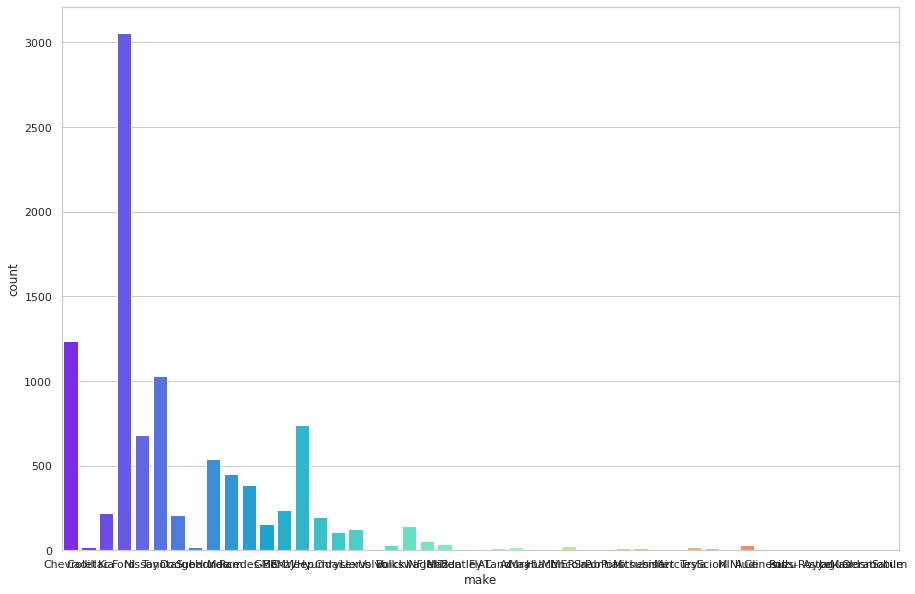

In [41]:
sns.set_style('whitegrid')
sns.countplot(x= 'make', data=df, palette='rainbow')
sns.set(rc = {'figure.figsize':(15,10)})

In [42]:
df_cor = pd.concat([df, pd.get_dummies(df['make'], prefix='model')],axis=1)
df_cor

year       make     model  ... model_Volkswagen model_Volvo  model_smart
0     2021  Chevrolet  Suburban  ...                0           0            0
1     2017   Cadillac       CTS  ...                0           0            0
2     2019        Kia     Forte  ...                0           0            0
3     2018       Ford     F-150  ...                0           0            0
4     2018       Ford     F-150  ...                0           0            0
...    ...        ...       ...  ...              ...         ...          ...
9895  2019     Toyota    Tacoma  ...                0           0            0
9896  2019      Honda      CR-V  ...                0           0            0
9897  2016      Dodge   Journey  ...                0           0            0
9898  2020     Toyota   Corolla  ...                0           0            0
9899  2019     Toyota     Camry  ...                0           0            0

[9900 rows x 61 columns]

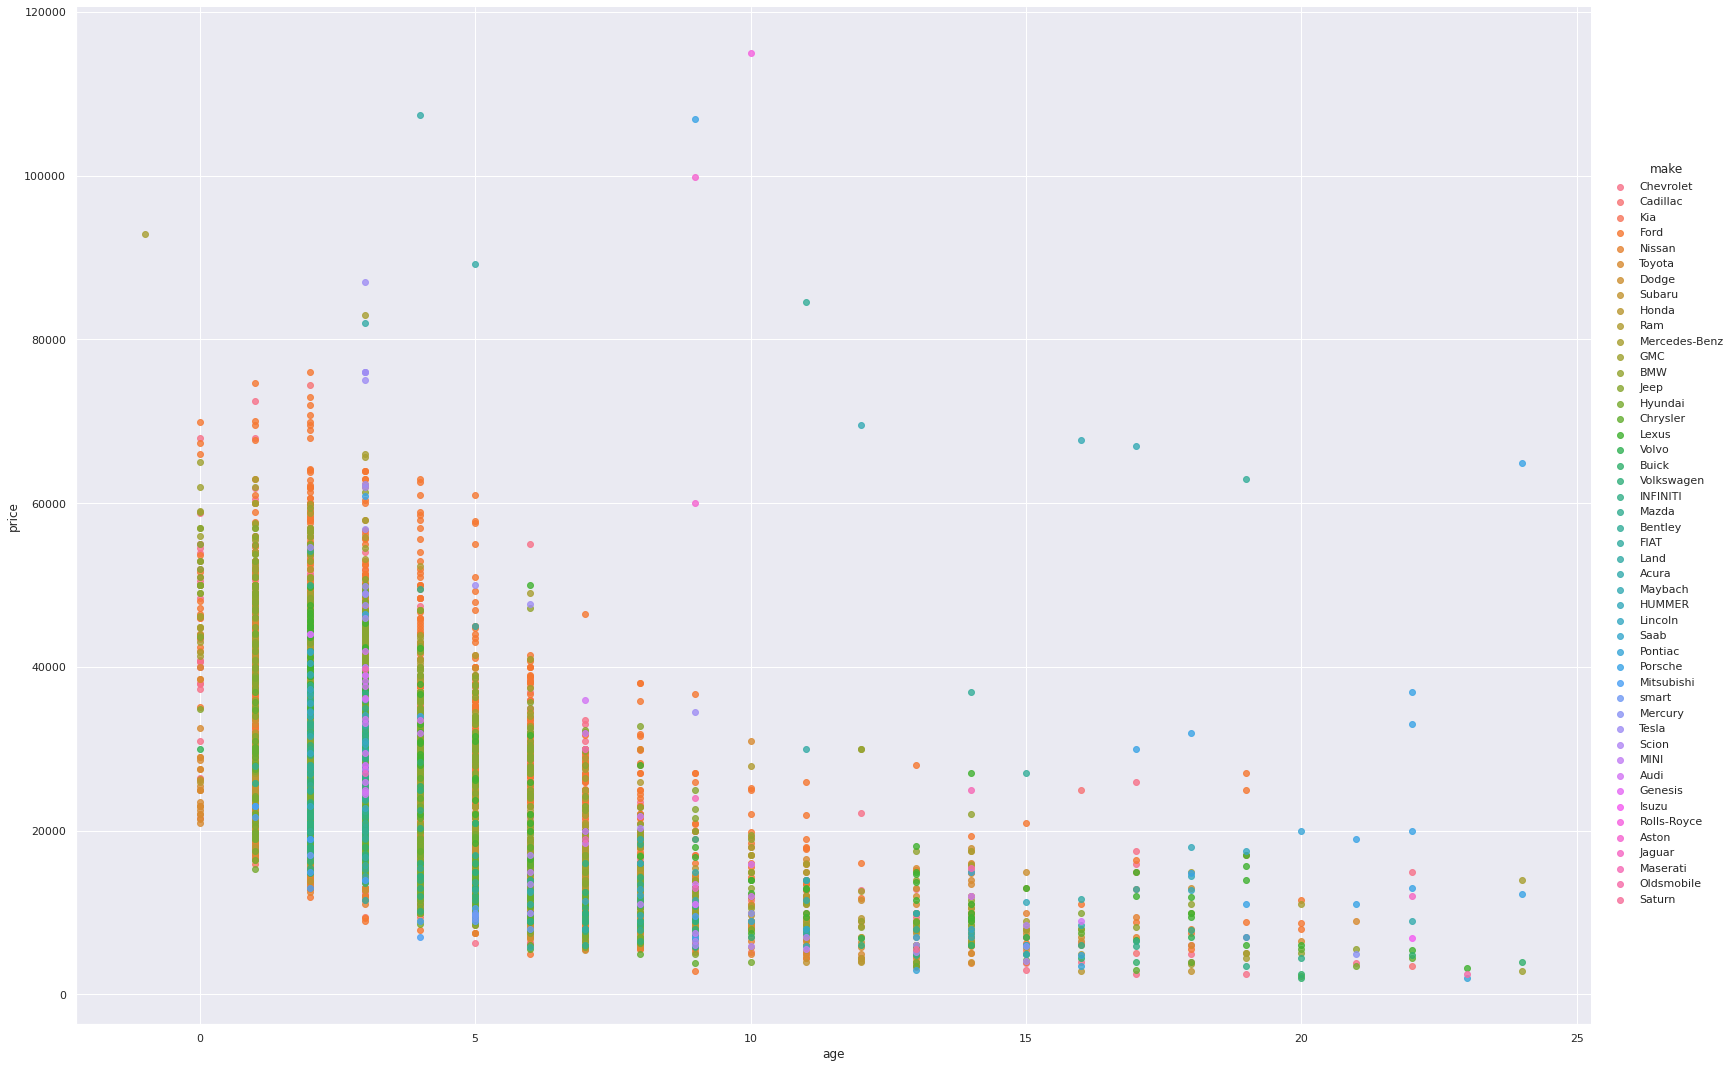

In [43]:
sns.lmplot(x='age', y='price', hue='make', data= df_cor, fit_reg= False, height=15, aspect=1.5)

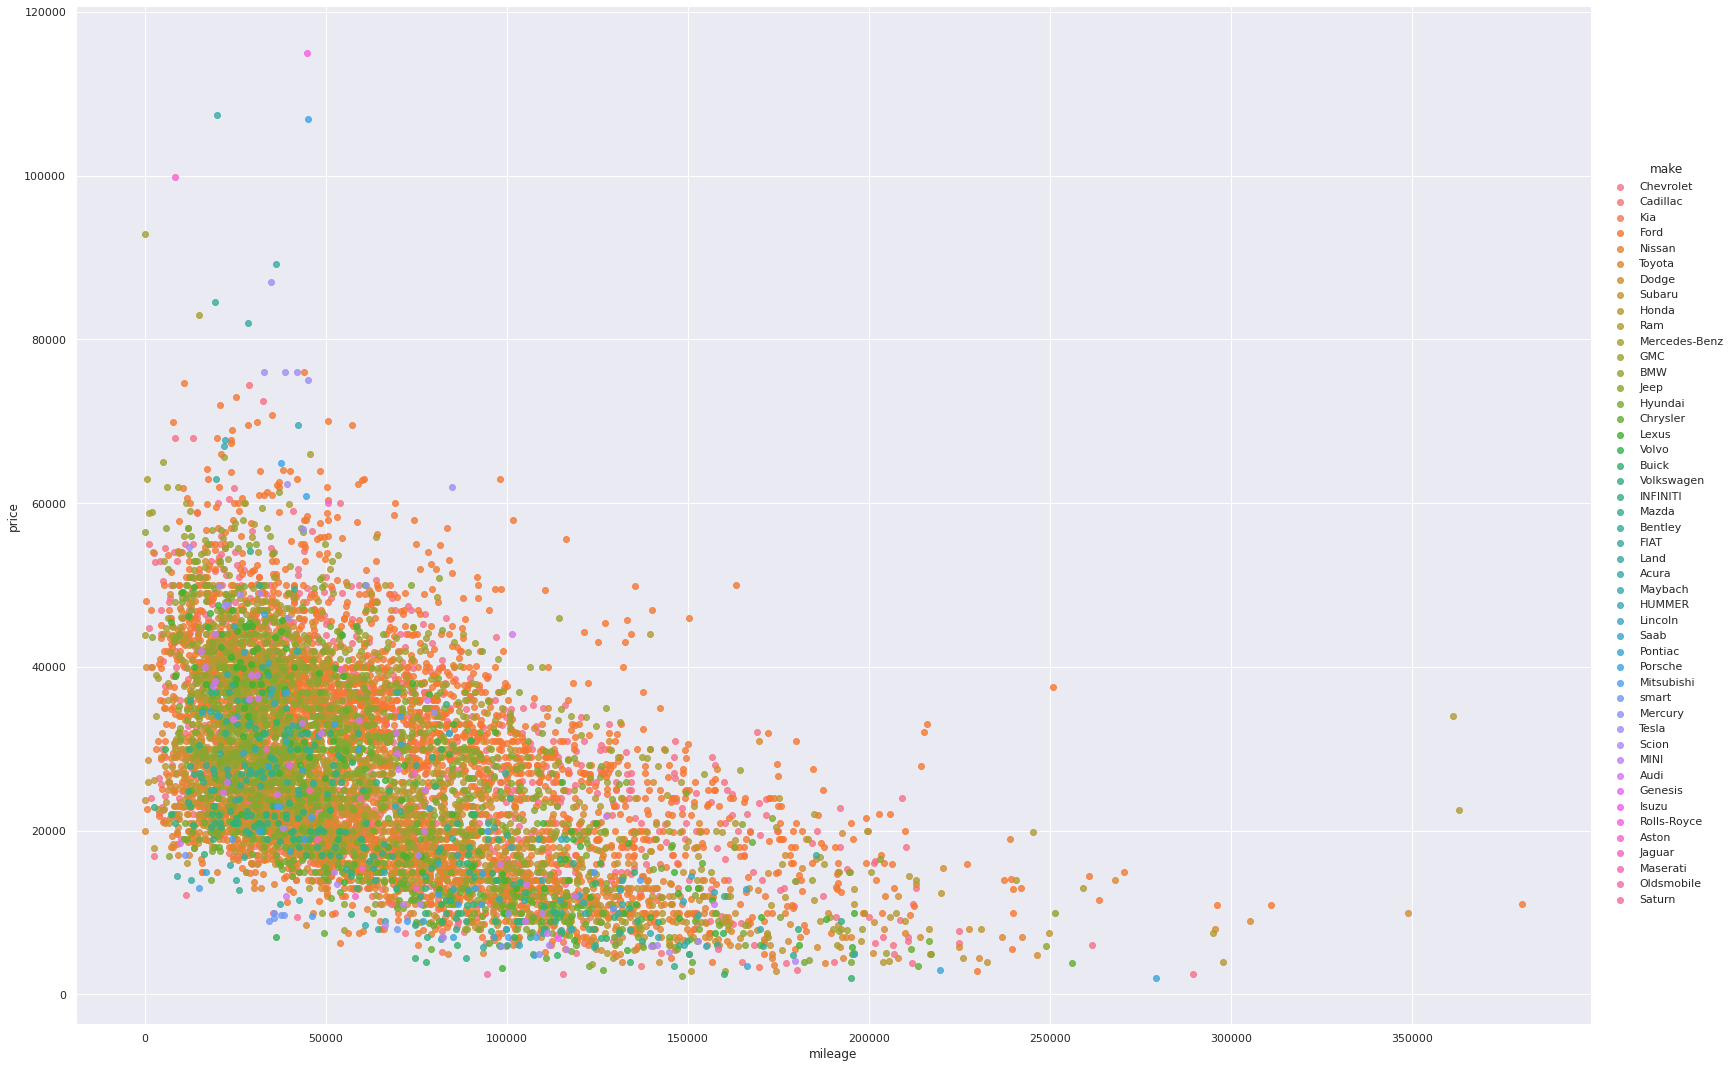

In [44]:
sns.lmplot(x='mileage', y='price', hue='make', data= df_cor, fit_reg= False, height=15, aspect=1.5)

# **Gini Score for Feature Importance**

In [45]:
df.head(5)

year       make     model  ... original_Price   depreciation  percent_Loss
0  2021  Chevrolet  Suburban  ...  408679.188580  340685.188580      0.166375
1  2017   Cadillac       CTS  ...  222389.181067  185389.181067      0.166375
2  2019        Kia     Forte  ...  134605.559730  112210.559730      0.166375
3  2018       Ford     F-150  ...  126190.833959  105195.833959      0.166375
4  2018       Ford     F-150  ...  198274.981217  165286.981217      0.166375

[5 rows x 14 columns]

In [57]:
X = df.drop(['price', "make", "model", "city", "state", "style", "percent_Loss"], axis=1)
y = df['price']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [59]:
et = ExtraTreesRegressor(n_estimators=100)
et.fit(X_train, y_train)

ExtraTreesRegressor()

In [60]:
et.feature_importances_

array([3.00891843e-02, 1.86602296e-02, 7.31300645e-07, 6.35132684e-04,
       1.77563618e-02, 4.66356964e-01, 4.66501396e-01])

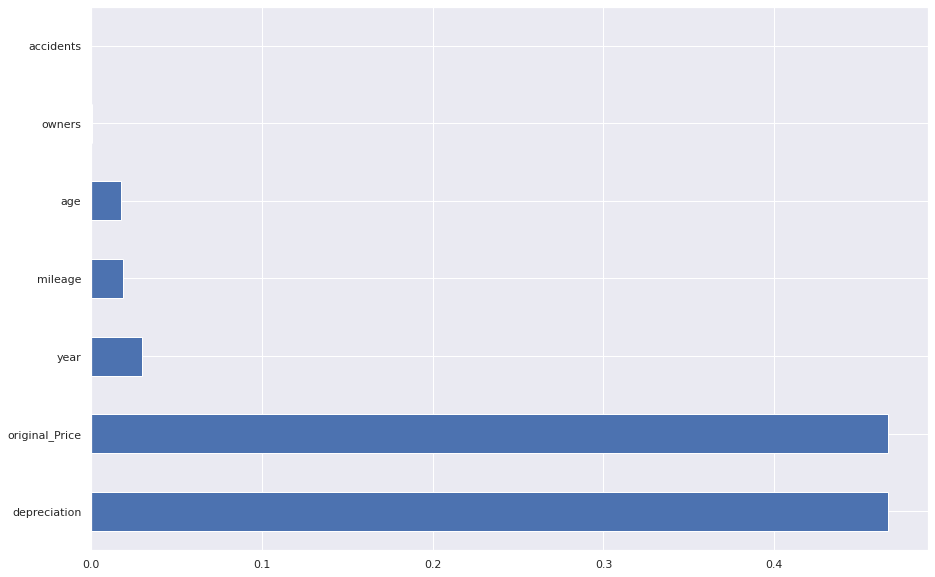

In [61]:
(pd.Series(et.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh'))

# **Running KMeans**

In [62]:
def doKMeans(df, iterations=50):
  try:
    df.drop('cluster', axis=1, inplace=True)
  except:
    next
  X = df.iloc[:,1:]

  S={}
  SSE = {}

  rb = RobustScaler()
  X_rb = rb.fit_transform(X)

  for k in range(2, iterations):
      kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
      kmeans.fit(X_rb)
      SSE[k] = kmeans.inertia_
      S[k] = silhouette_score(X_rb, kmeans.labels_, random_state=10)


  fig, axs = plt.subplots(2)
  fig.tight_layout()
  axs[0].plot(list(SSE.keys()), list(SSE.values()))
  axs[0].set_xlabel("Number of Clusters")
  axs[0].set_ylabel("SSE Within Cluster")
  axs[0].set_title("Within Cluster SSE After K-Means Clustering")
  axs[0].set_xticks([i for i in range(2, iterations)])

  axs[1].plot(list(S.keys()), list(S.values()))
  axs[1].set_xlabel('Number of clusters')
  axs[1].set_ylabel("Silhouette Score")
  axs[1].set_xticks([i for i in range(2, iterations)])

def applyKMeans(df, clusters=2):
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]

    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10)  
    kmeans.fit(X_rb) 
    score = silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score))
    print("sse withing cluster: " + str(sse_within_cluster))
        
    return df

In [71]:
cluster_col = ['price', 'age', 'mileage', 'depreciation', 'original_Price']
df_cluster = df_cor[cluster_col]

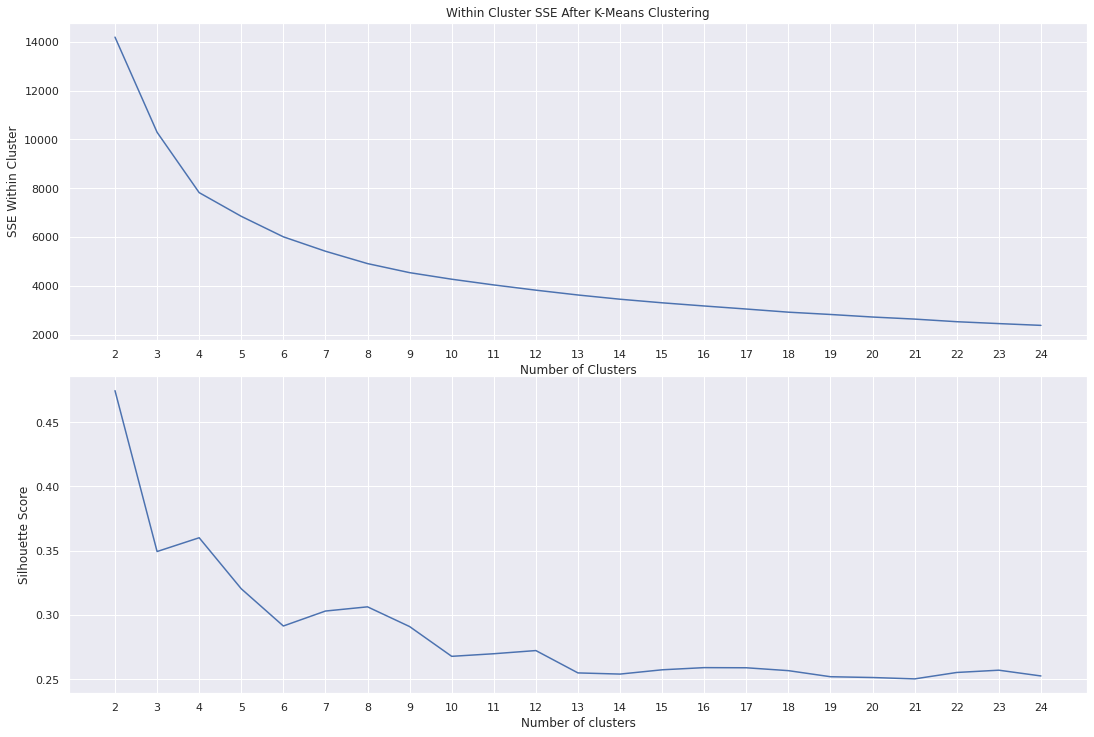

In [72]:
doKMeans(df_cluster, iterations=25)

In [73]:
first_trial = applyKMeans(df_cluster, clusters=6)

clustering performance
-----------------------------------
silhouette score: 0.2914286356801183
sse withing cluster: 6005.529878076739


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [74]:
cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"price": "mean", "age": "mean", "mileage": "mean", "original_Price": "mean", "depreciation": "mean"})
    .sort_values('price')
    .reset_index()
)
cluster_perf_df

cluster         price  ...  original_Price   depreciation
0        4  10308.353135  ...    61958.546268   51650.193133
1        2  13118.474427  ...    78848.832017   65730.357590
2        3  20115.454594  ...   120904.310105  100788.855511
3        0  23102.668725  ...   138859.015628  115756.346902
4        1  35461.681347  ...   213143.088488  177681.407141
5        5  48338.902222  ...   290541.861591  242202.959369

[6 rows x 6 columns]

# **Modeling**

In [75]:
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import preprocessing
from sklearn import utils

In [81]:
rf = RandomForestRegressor()

In [82]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [83]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [84]:
pred = rf.predict(X_test)
print(metrics.r2_score(y_test, pred))

0.999996748630097


In [85]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df1 = results.head(40)
df1.head(30)

Actual  Predicted
1284   44990   44990.07
5935   30926   30922.50
8785   12990   12990.20
3323   15358   15351.92
323    20500   20499.84
7980   37000   37000.00
4491   45988   45988.20
2295   42772   42773.65
8977   22329   22323.76
1499   27988   27987.89
5260   22990   22990.00
6409   36498   36498.33
6951   23877   23876.78
4890   50970   50978.22
7933   34906   34905.41
2262   28990   28990.01
5119   21291   21286.72
2312   15195   15296.79
8784   10995   10994.97
7646   34994   34993.72
5069   16595   16598.48
5798   28500   28500.00
8624   30195   30215.33
8285   25999   25999.00
5408   30785   30782.06
5044   21543   21540.82
7626   28500   28501.00
9416   48886   48890.56
2318   25977   25977.17
4305   36605   36595.19

In [97]:
classifiers = [
    KNeighborsClassifier(2),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier()]

In [96]:
from datetime import datetime
import time

X = StandardScaler().fit_transform(df.drop(columns= ['price', "make", "model", "city", "state", "style", "percent_Loss"]))
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25)
max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    pred = clf.predict(X_train)
    # F1 Score matrix
    f1 = f1_score(y_train, pred, average='macro')
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score))
    print('F1 SCORE = %.2f,' %(f1))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
print(80*'-' )
return clf_best

Classifier = Nearest Neighbors, Score (test, accuracy) = 1.21,
F1 SCORE = 0.43,
Classifier = Decision Tree, Score (test, accuracy) = 5.66,
F1 SCORE = 0.00,
Classifier = Random Forest, Score (test, accuracy) = 3.35,
F1 SCORE = 0.01,


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Classifier = Neural Net, Score (test, accuracy) = 1.45,
F1 SCORE = 0.00,


KeyboardInterrupt: ignored

In [102]:
names = ["Linear Regression", "MLPRegressor", "RandomForestRegressor", 
            "KNNRegressor", "XBoost Regressor"]

params = {'n_estimators': 500,
            'max_depth': 4,
            'min_samples_split': 5,
            'learning_rate': 0.01,
            'loss': 'ls'}

regressors = [
      LinearRegression(),
      MLPRegressor(random_state=1, max_iter=500),
      RandomForestRegressor(max_depth=2, random_state=0),
      KNeighborsRegressor(n_neighbors=2),
      GradientBoostingRegressor(**params)]

In [105]:
max_score = 0.0
max_class = ''
# iterate over regressors
for name, clf in zip(names, regressors):
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    pred = clf.predict(X_train)
    r2 = r2_score(y_train, pred)
    print('R2 SCORE = %.2f,' %(r2))
    print('regressors = %s, Score (test, accuracy) = %.2f,' %(name, score))
    
    if score > max_score:
        reg_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> regressors = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))


R2 SCORE = 1.00,
regressors = Linear Regression, Score (test, accuracy) = 100.00,


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


R2 SCORE = 0.87,
regressors = MLPRegressor, Score (test, accuracy) = 86.84,
R2 SCORE = 0.89,
regressors = RandomForestRegressor, Score (test, accuracy) = 90.36,
R2 SCORE = 1.00,
regressors = KNNRegressor, Score (test, accuracy) = 99.05,


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


R2 SCORE = 1.00,
regressors = XBoost Regressor, Score (test, accuracy) = 99.99,
--------------------------------------------------------------------------------
Best --> regressors = Linear Regression, Score (test, accuracy) = 100.00
